# Задача 1: Ресторан Chipo – знакомство с данными

В этой задаче будем анализировать заказы одного мексиканского ресторана

**Шаг 1:** Импортируйте `pandas`

In [291]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors


%matplotlib inline

FILEPATH_1 = "chipotle.tsv"
FILEPATH_2 = "profession"

**Шаг 2:** Создайте датафрейм, загрузите в него датасет вот [отсюда](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv) (по ссылке `.tsv` файл, tab-separated-variable, не comma-separated!)

In [186]:
df = pd.read_csv(FILEPATH_1, sep='\t') 

**Шаг 3:** Покажите первые 7 записей

In [42]:
df.head(7)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69


**Шаг 4:** Сколько всего записей? 

In [43]:
len(df)

4622

**Шаг 5:** Сколько всего столбцов? Выведите названия всех столбцов.

In [44]:
print(f"Всего столбцов {len(df.columns)}")
print(list(df.columns))

Всего столбцов 5
['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


**Шаг 6:** Какой индекс у датафрейма?

In [45]:
df.index.values

array([   0,    1,    2, ..., 4619, 4620, 4621], dtype=int64)

Заказ состоит из `item_name` – наименования, и `choice_description` – уточнение. Например, `item_name` может быть `Canned Soda` – газировка в банке, и его `choice_description` будет `Diet Coke` – диетическая кола.

**Шаг 7:** Какое наименование заказывали больше всего раз? Сколько раз?

In [46]:
df["item_name"].value_counts().idxmax(), df["item_name"].value_counts().max()

('Chicken Bowl', 726)

**Шаг 10:** Какое уточнение чаще всего встречается?

In [47]:
df["choice_description"].value_counts().idxmax(), df["choice_description"].value_counts().max()

('[Diet Coke]', 134)

**Шаг 11:** Переводим цену в `float`.

**11.1:** Проверьте текущий тип (переменной) цены.

In [48]:
df["item_price"].dtype

dtype('O')

**11.2:** Напишите лямбда функцию, которая отфильтрует символ $ из цены, и тд, и вернет `float`.

Примените ее к колонке цены

In [49]:
df["item_price"] = df["item_price"].map(lambda x: float(x.replace("$", "").replace(" ", "")))

**11.3:** Проверьте тип цены теперь

In [50]:
df["item_price"].dtype

dtype('float64')

**Шаг 11:** Какая была общая выручка ресторана за все это время?

In [51]:
df["item_price"].sum()

34500.16

**Шаг 12:** Сколько всего заказов было сделано? Какая средняя выручка на заказ?

In [53]:
df.order_id.max(), df.item_price.sum() / df.order_id.max()

(1834, 18.811428571428575)

**Шаг 13:** Как много у нас в ресторане уникальных наименований?

In [56]:
len(df.item_name.unique())

50

# Задача 1.2: Ресторан Chipo – фильтруем данные

Теперь потренируемся в фильтрации и сортировке

**Шаг 1:** Как много наименований стоят больше $10?

In [63]:
len(df[["item_name", "item_price"]][df["item_price"] > 10]["item_name"].unique())

31

**Шаг 2:** Какая цена каждого наименования (мы снова потеряли свое меню)? Внимание, у записи есть еще поле `quantity`, в одной записи одно наименование могло быть заказано несколько раз!

Пояснение: Так как цена зависит от уточнений, то для цены наименования в задании возьму минимальную цену наименования (без учёта уточнений, если они были, либо стандартных уточнений)

In [145]:
df["real_price_item"] = df["item_price"] / df["quantity"]

menu = df[["item_name", "real_price_item"]].groupby("item_name").min().reset_index()

del df["real_price_item"]

menu

,item_name,real_price_item
0,6 Pack Soft Drink,6.49
1,Barbacoa Bowl,8.69
2,Barbacoa Burrito,8.69
3,Barbacoa Crispy Tacos,8.99
4,Barbacoa Salad Bowl,9.39
5,Barbacoa Soft Tacos,8.99
6,Bottled Water,1.09
7,Bowl,7.40
8,Burrito,7.40
9,Canned Soda,1.09


**Шаг 3:** Сколько всего раз заказали самое дорогое наше блюдо?

In [87]:
df["real_price_item"] = df["item_price"] / df["quantity"]

expensive_item = df[["item_name", "real_price_item"]].groupby("item_name").min().idxmax().item()

del df["real_price_item"]

print(len(df[df["item_name"] == expensive_item]))

10


**Шаг 4:** Как много раз заказали больше одной `Canned Soda` за раз?

In [71]:
len(df[(df["item_name"] == "Canned Soda") & (df["quantity"] > 1)])

20

# Задача 1.3: Ресторан Chipo – немного графиков
Теперь построим пару графиков

**Шаг 1:** Построим bar chart пяти наиболее популярных наименований. Подпишите все оси и т.д.

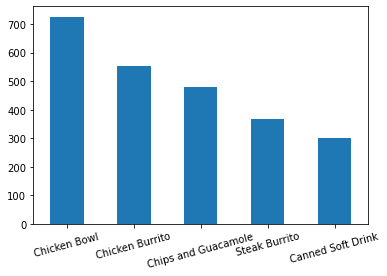

In [103]:
df["item_name"].value_counts()[:5].plot.bar(x='item_name', y='count', rot=15)

**Шаг 2:** Построим scatterplot: по оси x – цена наименования, по оси y – сколько раз это наименование заказывали.

_Бонус:_ Посчитайте коэффициент корреляции (Pearson's correlation coefficient).

In [166]:
count_df = pd.DataFrame(df["item_name"].value_counts()).reset_index().rename(columns={"index": "item_name", "item_name": "count_orders"})

In [178]:
# Точнее будет считать с учётом quantity
count_df = df[["item_name", "quantity"]].groupby("item_name").sum().reset_index()

In [180]:
merge_df = pd.merge(count_df, menu, on="item_name")

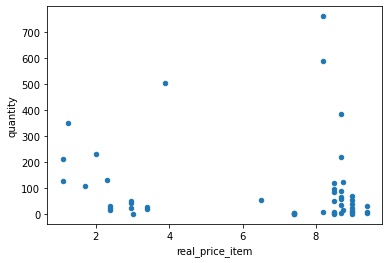

In [181]:
merge_df.plot.scatter(y=merge_df.columns[1], x=merge_df.columns[2])

In [184]:
merge_df[["quantity", "real_price_item"]].corr()

,quantity,real_price_item
quantity,1.00000,-0.10538
real_price_item,-0.10538,1.00000


# Задача 2: Профессии – Groupby

В этой задаче будем группировать и анализировать.

**Шаг 1:** Загрузите датасет вот [отсюда](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user), посмотрите на первые несколько записей, чтобы ознакомиться

In [188]:
df_prof = pd.read_csv(FILEPATH_2, sep='|') 
df_prof.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


**Шаг 2:** Найдите средний возраст для каждой профессии

In [192]:
df_prof[["occupation", "age"]].groupby("occupation").mean().reset_index().rename(columns={"age": "mean_age"})

,occupation,mean_age
0,administrator,38.746835
1,artist,31.392857
2,doctor,43.571429
3,educator,42.010526
4,engineer,36.388060
5,entertainment,29.222222
6,executive,38.718750
7,healthcare,41.562500
8,homemaker,32.571429
9,lawyer,36.750000


**Шаг 3:** Найдите долю мужчин в каждой профессии и выведите рейтинг специальностей по убыванию этой доли

In [213]:
agg_df_prof = df_prof[["occupation", "gender", "user_id"]].groupby(["occupation", "gender"]).count().reset_index().rename(columns={"user_id": "count_by_gender"})
agg_df_prof_male = agg_df_prof[agg_df_prof["gender"] == "M"]
merge_df_prof = pd.merge(agg_df_prof_male, agg_df_prof[["occupation", "count_by_gender"]].groupby("occupation").sum().reset_index(), on="occupation")

In [214]:
merge_df_prof["share_male"] = merge_df_prof["count_by_gender_x"] / merge_df_prof["count_by_gender_y"]
del merge_df_prof["count_by_gender_x"], merge_df_prof["count_by_gender_y"], merge_df_prof["gender"]

In [218]:
merge_df_prof.sort_values(by="share_male", ascending=False)

,occupation,share_male
2,doctor,1.000000
4,engineer,0.970149
19,technician,0.962963
15,retired,0.928571
14,programmer,0.909091
6,executive,0.906250
17,scientist,0.903226
5,entertainment,0.888889
9,lawyer,0.833333
16,salesman,0.750000


**Шаг 4:** Найдите наименьший и наибольший возраст в каждой профессии

In [221]:
min_age_df = df_prof[["occupation", "age"]].groupby("occupation").min().reset_index().rename(columns={"age": "min_age"})
max_age_df = df_prof[["occupation", "age"]].groupby("occupation").max().reset_index().rename(columns={"age": "max_age"})
result_age_df = pd.merge(min_age_df, max_age_df, on="occupation")

In [222]:
result_age_df

,occupation,min_age,max_age
0,administrator,21,70
1,artist,19,48
2,doctor,28,64
3,educator,23,63
4,engineer,22,70
5,entertainment,15,50
6,executive,22,69
7,healthcare,22,62
8,homemaker,20,50
9,lawyer,21,53


**Шаг 5:** Для каждой пары (профессия, пол) найдите средний возраст

In [224]:
df_prof[["occupation", "gender", "age"]].groupby(["occupation", "gender"]).mean().reset_index().rename(columns={"age": "mean_age"})


,occupation,gender,mean_age
0,administrator,F,40.638889
1,administrator,M,37.162791
2,artist,F,30.307692
3,artist,M,32.333333
4,doctor,M,43.571429
5,educator,F,39.115385
6,educator,M,43.101449
7,engineer,F,29.500000
8,engineer,M,36.600000
9,entertainment,F,31.000000


**Шаг 6:** Постройте двойной bar chart (grouped bar chart) – распределения мужчин и женщин (двумя разными цветами) по профессиям

In [266]:
agg_df_prof = df_prof[["occupation", "gender", "user_id"]].groupby(["occupation", "gender"]).count().reset_index().rename(columns={"user_id": "count_by_gender"})
merge_df_prof = pd.merge(agg_df_prof, agg_df_prof[["occupation", "count_by_gender"]].groupby("occupation").sum().reset_index(), on="occupation")
merge_df_prof["share_gender"] = merge_df_prof["count_by_gender_x"] / merge_df_prof["count_by_gender_y"]
del merge_df_prof["count_by_gender_x"], merge_df_prof["count_by_gender_y"]

In [270]:
merge_df_prof

,occupation,gender,share_gender
0,administrator,F,0.455696
1,administrator,M,0.544304
2,artist,F,0.464286
3,artist,M,0.535714
4,doctor,M,1.000000
5,educator,F,0.273684
6,educator,M,0.726316
7,engineer,F,0.029851
8,engineer,M,0.970149
9,entertainment,F,0.111111


In [271]:
df_pivot = pd.pivot_table(
    merge_df_prof, 
    values="share_gender",
    index="occupation",
    columns="gender"
)

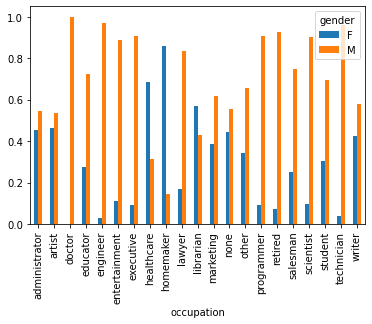

In [274]:
df_pivot.plot.bar()

# Задача 3: Matplotlib

В этой задаче будем строить график с подписями.

Вот названия планет Солнечной системы:

In [278]:
names = ["Mercury", "Venus", "Earth", "Mars", "Jupiter", "Saturn", 
         "Uranus", "Neptune", "Pluto"]

Вот расстояния от Солнца до них (расстояние от Солнца до Земли взято за 1):

In [279]:
distances = np.array([0.39, 0.72, 1.00, 1.52, 5.20, 9.54, 19.22, 30.06, 39.48])

Вот периоды их обращений (в Земных годах) вокруг солнца:

In [280]:
periods = np.array([0.24, 0.62, 1.00, 1.88, 11.86, 29.46, 84.01, 164.8, 248.09])

Вот средние (дневные) температуры поверхности (в градусах Цельсия):

In [281]:
temps = [430, 471, 16, -28, -108, -138, -195, -201, -233]

Вот их радиусы (в километрах):

In [282]:
rads = [2440, 6052, 6371, 3390, 69911, 58232, 25362, 24622, 1188]

**Постройте график**, где:
- по оси икс – логарифм расстояния
- по оси игрек – логарифм периода обращения
- размером точки – радиус планеты
- цветом точки – температура (выберите подходящий diverging colormap, чтобы 0 градусов по цельсию соответствовал белый цвет)

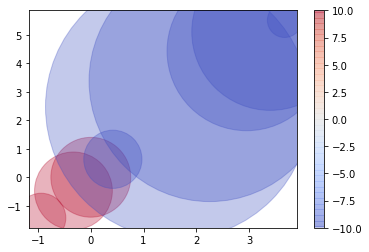

In [290]:
divnorm=colors.TwoSlopeNorm(vmin=-10., vcenter=0., vmax=10)

plt.scatter(
    x=np.log(distances),
    y=np.log(periods), 
    c=temps, 
    s=rads, 
    alpha=0.3,
    cmap='coolwarm',
    norm=divnorm
)

plt.colorbar();